# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Module

In [ ]:
!pip install gensim==4.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pickle
from tqdm import tqdm
import torch
import torch.nn as nn
import gensim

# Load data from google drive

In [3]:
with open("/content/drive/MyDrive/오더퀸/semantic_embedding/domain_data.pkl", "rb") as f:
    domain_data = pickle.load(f)


# Load fasttext embedding

In [ ]:
# model_path = "/content/drive/MyDrive/오더퀸/semantic_embedding/cc.ko.300.bin.gz"

# ko_fasttext = gensim.models.fasttext.load_facebook_vectors(model_path)


In [4]:
with open("/content/drive/MyDrive/오더퀸/semantic_embedding/post_vector.pkl", "rb") as f:
    domain_vector = pickle.load(f)

# Check embedding vector

In [ ]:
# example = domain_data["로드락후라이드 건대점"][1][0].split()[0]
# print(example)
# print(ko_fasttext[example])
# print("dimension of model:", len(ko_fasttext[example]))

# Find the average of the words in the post for embedding vector of blog post

In [ ]:
# print(domain_data["로드락후라이드 건대점"][0])

# for k, v in domain_data.items():
#     print(k, len(v))

In [ ]:

# domain_vector = {key: [] for key in domain_data.keys()}
# for domain in tqdm(domain_data.keys()):
#     for post in domain_data[domain]:
#         tmp = torch.zeros(300, dtype=torch.float)
#         count = 0
#         for sentence in post:
#             word_list = sentence.split()
#             for word in word_list:
#                 word_vector = torch.FloatTensor(ko_fasttext[word])
#                 tmp += word_vector
#                 count += 1
        
#         tmp = tmp / count

#         domain_vector[domain].append(tmp)


In [ ]:
print("==== vector of first blog post in 로드락후라이드 건대점 ====")
print("dimesion of vector:", len(domain_vector["로드락후라이드 건대점"][0]))
print(domain_vector["로드락후라이드 건대점"][0])

==== vector of first blog post in 로드락후라이드 건대점 ====
dimesion of vector: 300
tensor([-5.6334e-03, -2.8009e-02, -1.3950e-02,  2.7656e-02, -2.3938e-02,
         7.2766e-02, -3.4746e-02,  1.3810e-02, -3.0870e-04, -1.1558e-02,
         1.9994e-03,  3.9370e-02,  1.4336e-02, -2.8062e-02,  6.6204e-03,
         2.8641e-02, -9.5596e-03, -1.9695e-02,  2.5573e-03,  5.5315e-03,
         8.7067e-03,  4.6812e-03,  3.4049e-02,  8.1599e-03, -1.9303e-02,
         5.8295e-01,  3.6289e-02,  1.7827e-02, -1.3082e-02,  2.3976e-02,
        -1.0246e-02, -1.4112e-02, -3.5139e-03, -2.3786e-03, -2.7237e-02,
        -3.8969e-02,  4.0942e-02, -1.1921e-02,  3.5973e-02, -1.3803e-02,
         4.3029e-03,  7.3978e-03,  8.5309e-03,  2.8590e-02,  5.6281e-03,
        -3.9477e-02,  2.1049e-02,  3.9564e-02, -3.8082e-02, -2.4156e-02,
         6.8917e-03, -2.9738e-02,  2.7324e-03,  3.1777e-02,  3.7698e-02,
        -6.7538e-03, -6.6745e-02, -1.3220e-02, -1.9376e-01,  1.3648e-02,
         2.1429e-02,  2.7191e-02, -1.6740e-02, -5

# Save vector list

In [ ]:
# with open("/content/drive/MyDrive/오더퀸/semantic_embedding/post_vector.pkl", "wb") as f:
#     pickle.dump(domain_vector, f)

# Preprocessing for visualization

In [5]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [6]:
post_vector = {domain: [] for domain in domain_data.keys()}

for domain, vector_list in domain_vector.items():
    for post in vector_list:
        post_vector[domain].append(np.array(post))

In [7]:
post_list = []

for domain in post_vector.keys():
    for count in range(len(domain_vector[domain])):
        post_list.append("%s_%d" % (domain, count))

print(post_list)

['로드락후라이드 건대점_0', '로드락후라이드 건대점_1', '로드락후라이드 건대점_2', '로드락후라이드 건대점_3', '로드락후라이드 건대점_4', '로드락후라이드 건대점_5', '로드락후라이드 건대점_6', '로드락후라이드 건대점_7', '로드락후라이드 건대점_8', '로드락후라이드 건대점_9', '로드락후라이드 건대점_10', '로드락후라이드 건대점_11', '로드락후라이드 건대점_12', '로드락후라이드 건대점_13', '로드락후라이드 건대점_14', '로드락후라이드 건대점_15', '로드락후라이드 건대점_16', '로드락후라이드 건대점_17', '로드락후라이드 건대점_18', '로드락후라이드 건대점_19', '로드락후라이드 건대점_20', '로드락후라이드 건대점_21', '로드락후라이드 건대점_22', '로드락후라이드 건대점_23', '로드락후라이드 건대점_24', '로드락후라이드 건대점_25', '로드락후라이드 건대점_26', '로드락후라이드 건대점_27', '로드락후라이드 건대점_28', '로드락후라이드 건대점_29', '로드락후라이드 건대점_30', '로드락후라이드 건대점_31', '로드락후라이드 건대점_32', '로드락후라이드 건대점_33', '태리로제 한양대점_0', '태리로제 한양대점_1', '태리로제 한양대점_2', '태리로제 한양대점_3', '태리로제 한양대점_4', '태리로제 한양대점_5', '태리로제 한양대점_6', '태리로제 한양대점_7', '태리로제 한양대점_8', '태리로제 한양대점_9', '태리로제 한양대점_10', '태리로제 한양대점_11', '태리로제 한양대점_12', '태리로제 한양대점_13', '태리로제 한양대점_14', '태리로제 한양대점_15', '태리로제 한양대점_16', '태리로제 한양대점_17', '태리로제 한양대점_18', '태리로제 한양대점_19', '태리로제 한양대점_20', '태리로제 한양대점_21', '태리로제 한양대점_22', '태리로제 한양대점_23', '태리로제 한양대점_24', '태리로제 한

In [8]:
result_list = {post:[] for post in post_list}

for domain in post_vector.keys():
    for count, post in zip(range(len(domain_vector[domain])), domain_vector[domain]):
        result_list["%s_%d" % (domain, count)] = post

for k, v in result_list.items():
    print(k, len(v))

로드락후라이드 건대점_0 300
로드락후라이드 건대점_1 300
로드락후라이드 건대점_2 300
로드락후라이드 건대점_3 300
로드락후라이드 건대점_4 300
로드락후라이드 건대점_5 300
로드락후라이드 건대점_6 300
로드락후라이드 건대점_7 300
로드락후라이드 건대점_8 300
로드락후라이드 건대점_9 300
로드락후라이드 건대점_10 300
로드락후라이드 건대점_11 300
로드락후라이드 건대점_12 300
로드락후라이드 건대점_13 300
로드락후라이드 건대점_14 300
로드락후라이드 건대점_15 300
로드락후라이드 건대점_16 300
로드락후라이드 건대점_17 300
로드락후라이드 건대점_18 300
로드락후라이드 건대점_19 300
로드락후라이드 건대점_20 300
로드락후라이드 건대점_21 300
로드락후라이드 건대점_22 300
로드락후라이드 건대점_23 300
로드락후라이드 건대점_24 300
로드락후라이드 건대점_25 300
로드락후라이드 건대점_26 300
로드락후라이드 건대점_27 300
로드락후라이드 건대점_28 300
로드락후라이드 건대점_29 300
로드락후라이드 건대점_30 300
로드락후라이드 건대점_31 300
로드락후라이드 건대점_32 300
로드락후라이드 건대점_33 300
태리로제 한양대점_0 300
태리로제 한양대점_1 300
태리로제 한양대점_2 300
태리로제 한양대점_3 300
태리로제 한양대점_4 300
태리로제 한양대점_5 300
태리로제 한양대점_6 300
태리로제 한양대점_7 300
태리로제 한양대점_8 300
태리로제 한양대점_9 300
태리로제 한양대점_10 300
태리로제 한양대점_11 300
태리로제 한양대점_12 300
태리로제 한양대점_13 300
태리로제 한양대점_14 300
태리로제 한양대점_15 300
태리로제 한양대점_16 300
태리로제 한양대점_17 300
태리로제 한양대점_18 300
태리로제 한양대점_19 300
태리로제 한양대점_20 300
태리로제 한양대점_21 300


In [12]:
# save vector as Dataframe

vector_df = pd.DataFrame(result_list)

vector_df = vector_df.transpose()


vector_df = vector_df.dropna(axis=0)

vector_df.index = [i[:len(i)-2] for i in vector_df.index]

vector_df.head()


vector_df.to_csv("./drive/MyDrive/experiments/KioskRecSys/Semantic/vector.csv", encoding="utf-8-sig")

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = vector_df.values
y = vector_df.index

# x = StandardScaler().fit_transform(x)

features = list(range(300))

df = pd.DataFrame(x, columns=features)



In [ ]:
pca = PCA(n_components=2)
principal_compnents = pca.fit_transform(x)
principal_df = pd.DataFrame(principal_compnents, columns=["p_component_1", "p_component_2"])

principal_df.head()

,p_component_1,p_component_2
0,-0.001082,0.003086
1,0.165391,0.046246
2,0.017676,0.022505
3,-0.004425,0.010849
4,0.056538,-0.003063


In [ ]:
index = pd.DataFrame(y, columns=["domain"])

data_df = pd.concat([principal_df, index], axis=1)
data_df.head()


,p_component_1,p_component_2,domain
0,-0.001082,0.003086,로드락후라이드 건대점
1,0.165391,0.046246,로드락후라이드 건대점
2,0.017676,0.022505,로드락후라이드 건대점
3,-0.004425,0.010849,로드락후라이드 건대점
4,0.056538,-0.003063,로드락후라이드 건대점


In [ ]:
data_df.shape

(1162, 3)

# Setting for Korean font

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

# PCA

['#8A2BE2', '#A52A2A', '#DEB887', '#5F9EA0', '#7FFF00', '#D2691E', '#FF7F50', '#6495ED', '#FFF8DC', '#DC143C', '#00FFFF', '#00008B', '#008B8B', '#B8860B', '#A9A9A9', '#006400', '#A9A9A9', '#BDB76B', '#8B008B', '#556B2F', '#FF8C00', '#9932CC', '#8B0000', '#E9967A', '#8FBC8F', '#483D8B', '#2F4F4F', '#2F4F4F', '#00CED1', '#9400D3']
24
{'로드락후라이드 건대점': '#A9A9A9', '채선당 도시락&밀키트 상왕십리점': '#2F4F4F', '집밥뚝딱 자양2동점': '#DEB887', '태리로제 한양대점': '#006400', '할머니가래떡볶이 성동행당점': '#FF8C00', '낭만밥상 구의점': '#8B008B', '집밥뚝딱 금호역점': '#483D8B', '담다 아차산역': '#8B0000', '타코마이너 성수': '#008B8B', '옐로우스푼 왕십리 텐즈힐점': '#8A2BE2', '우주곰커피 건대점': '#B8860B', '더리터 중곡역점': '#BDB76B', '고피자 행당점': '#D2691E', '홈밀앤카페24 서울행당로점': '#FFF8DC', '뱃살도둑 건대점': '#8FBC8F', '고피자 건대점': '#00008B', '뉴욕쟁이디저트 뚝섬유원지역점': '#A9A9A9', '공릉동원조멸치국수 화양점': '#A52A2A', '커피베이 성동구점': '#FF7F50', '88시장버거 광진점': '#9400D3', '오거트 성수': '#9932CC', '집어가 왕십리점': '#DC143C', '삼삼구 한양대점': '#E9967A', '북촌손만두 성수낙낙점': '#5F9EA0'}


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


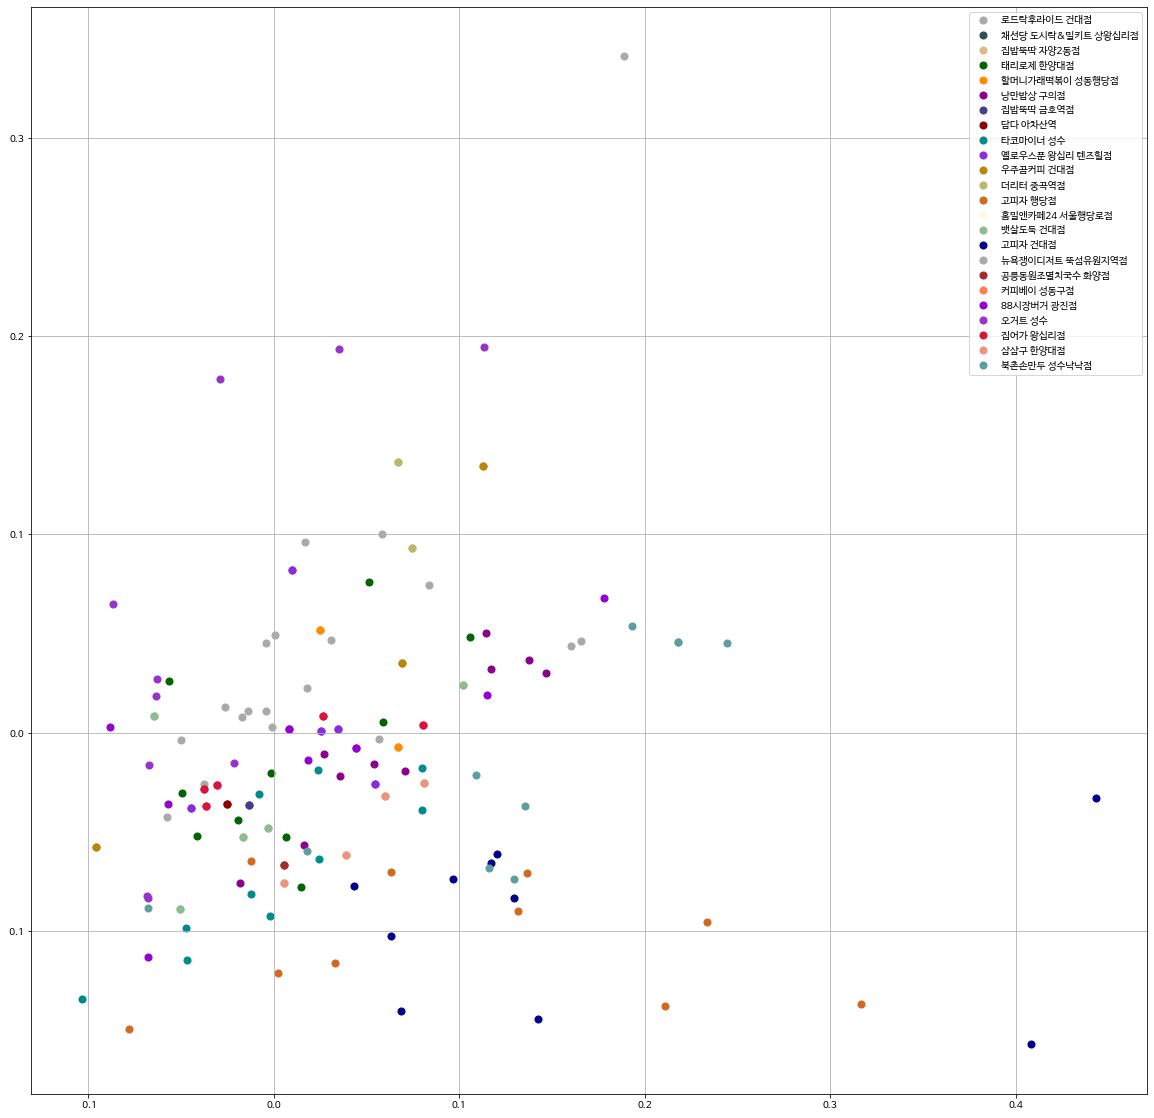

In [ ]:
from numpy.ma.core import size
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(20, 20))
colors = list(mcolors.CSS4_COLORS.values())[10:40]
print(colors)
color_list = np.random.choice(a=colors, size=24, replace=False)

print(len(color_list))
domain_color = {domain: color for domain, color in zip(domain_vector.keys(), color_list)}
print(domain_color)
targets, colors = domain_color.keys(), domain_color.values()

for target, color in zip(targets, colors):
    indicesToKeep = data_df["domain"] == target
    plt.scatter(data_df.loc[indicesToKeep, "p_component_1"], data_df.loc[indicesToKeep, "p_component_2"], c = color, s = 50)

plt.legend(targets)
plt.grid()
plt.show()

# T-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)
principal_compnents = tsne.fit_transform(x)
principal_df = pd.DataFrame(principal_compnents, columns=["p_component_1", "p_component_2"])

principal_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,p_component_1,p_component_2
0,-29.977209,-28.138351
1,-47.597710,-28.486479
2,-34.244423,-30.052383
3,0.035051,43.271278
4,-48.044231,23.840332


In [ ]:
index = pd.DataFrame(y, columns=["domain"])

data_df = pd.concat([principal_df, index], axis=1)
data_df.head()


,p_component_1,p_component_2,domain
0,-29.977209,-28.138351,로드락후라이드 건대점
1,-47.597710,-28.486479,로드락후라이드 건대점
2,-34.244423,-30.052383,로드락후라이드 건대점
3,0.035051,43.271278,로드락후라이드 건대점
4,-48.044231,23.840332,로드락후라이드 건대점


['#8A2BE2', '#A52A2A', '#DEB887', '#5F9EA0', '#7FFF00', '#D2691E', '#FF7F50', '#6495ED', '#FFF8DC', '#DC143C', '#00FFFF', '#00008B', '#008B8B', '#B8860B', '#A9A9A9', '#006400', '#A9A9A9', '#BDB76B', '#8B008B', '#556B2F', '#FF8C00', '#9932CC', '#8B0000', '#E9967A', '#8FBC8F', '#483D8B', '#2F4F4F', '#2F4F4F', '#00CED1', '#9400D3']
24
{'로드락후라이드 건대점': '#BDB76B', '채선당 도시락&밀키트 상왕십리점': '#FF7F50', '집밥뚝딱 자양2동점': '#7FFF00', '태리로제 한양대점': '#6495ED', '할머니가래떡볶이 성동행당점': '#A9A9A9', '낭만밥상 구의점': '#008B8B', '집밥뚝딱 금호역점': '#9400D3', '담다 아차산역': '#8A2BE2', '타코마이너 성수': '#5F9EA0', '옐로우스푼 왕십리 텐즈힐점': '#9932CC', '우주곰커피 건대점': '#483D8B', '더리터 중곡역점': '#2F4F4F', '고피자 행당점': '#DEB887', '홈밀앤카페24 서울행당로점': '#D2691E', '뱃살도둑 건대점': '#8FBC8F', '고피자 건대점': '#B8860B', '뉴욕쟁이디저트 뚝섬유원지역점': '#2F4F4F', '공릉동원조멸치국수 화양점': '#8B008B', '커피베이 성동구점': '#DC143C', '88시장버거 광진점': '#A9A9A9', '오거트 성수': '#FF8C00', '집어가 왕십리점': '#A52A2A', '삼삼구 한양대점': '#006400', '북촌손만두 성수낙낙점': '#00008B'}


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


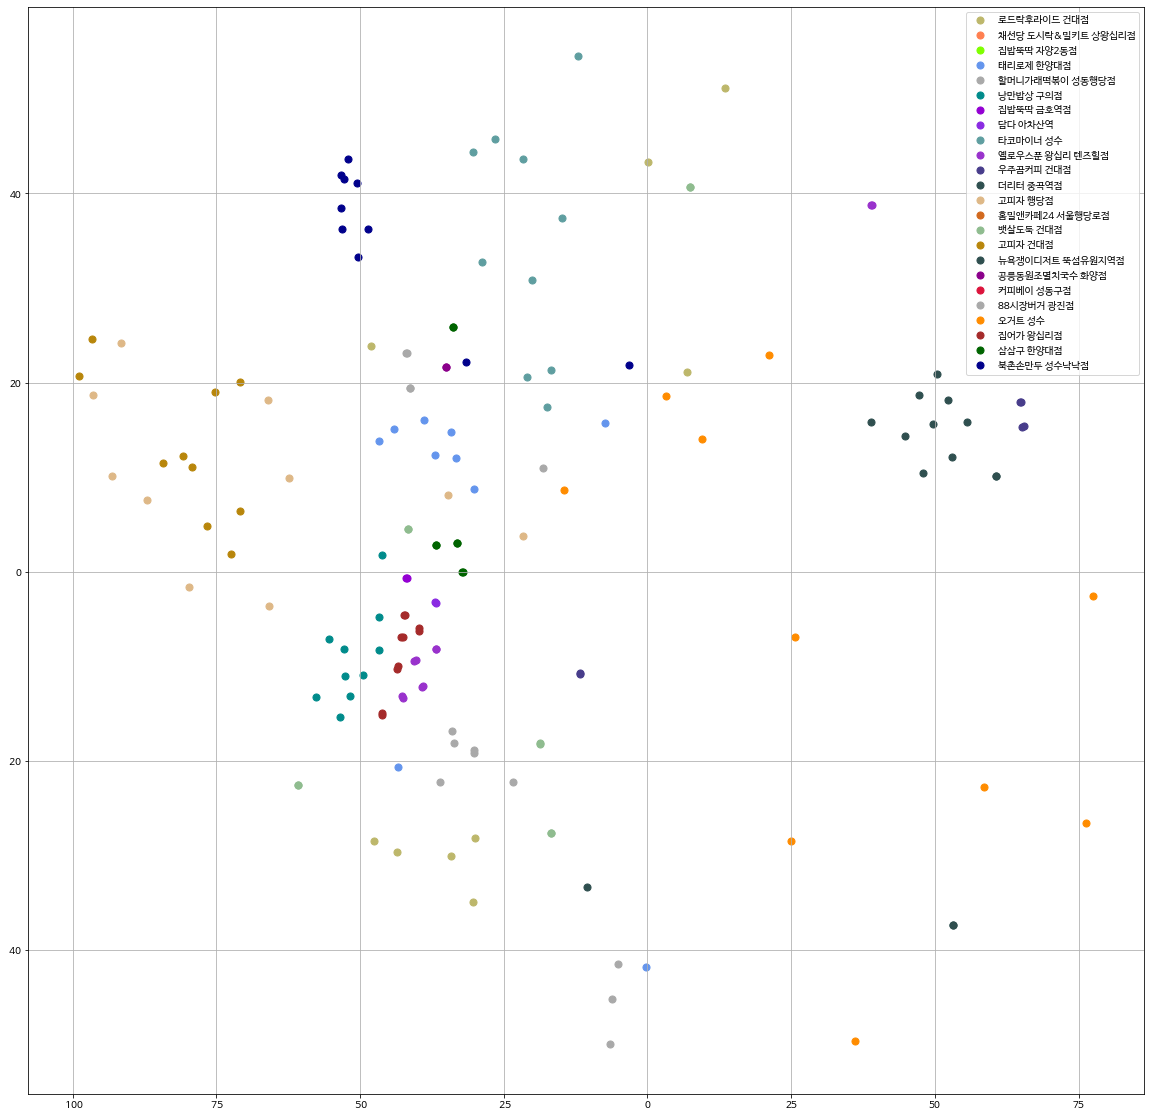

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(20, 20))
colors = list(mcolors.CSS4_COLORS.values())[10:40]
print(colors)
color_list = np.random.choice(a=colors, size=24, replace=False)

print(len(color_list))
domain_color = {domain: color for domain, color in zip(domain_vector.keys(), color_list)}
print(domain_color)
targets, colors = domain_color.keys(), domain_color.values()

for target, color in zip(targets, colors):
    indicesToKeep = data_df["domain"] == target
    plt.scatter(data_df.loc[indicesToKeep, "p_component_1"], data_df.loc[indicesToKeep, "p_component_2"], c = color, s = 50)

plt.legend(targets)
plt.grid()
plt.show()